# 1.1 Подготовка обучающей выборки

Загрузка необходимых библиотек

In [36]:
import pandas as pd
import numpy as np

Загрузка и объединение данных, удаляем дубликаты так как id поездок не может быть одинаковым

In [37]:
train_1 = pd.read_excel('train_first_part.xlsx')
train_2 = pd.read_json('train_second_part.json')

In [38]:
train_df = train_1.append(train_2)
train_df.drop_duplicates(subset = 'id', inplace = True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102721 entries, 0 to 2998
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  102721 non-null  object 
 1   vendor_id           102721 non-null  int64  
 2   pickup_datetime     102721 non-null  object 
 3   dropoff_datetime    102721 non-null  object 
 4   passenger_count     102721 non-null  int64  
 5   pickup_longitude    102721 non-null  float64
 6   pickup_latitude     102721 non-null  float64
 7   dropoff_longitude   102721 non-null  float64
 8   dropoff_latitude    102721 non-null  float64
 9   store_and_fwd_flag  102721 non-null  object 
 10  trip_duration       102721 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 9.4+ MB


Удаление неинформативных признаков

In [39]:
train_df.drop('vendor_id', axis = 1, inplace = True)
train_df.drop('store_and_fwd_flag', axis = 1, inplace = True)
train_df.drop('id', axis = 1, inplace = True)

# 1.2 Форматирование - приведение данных к приемлемому формату

Приводим столбцы с датой и временем в нужный формат. Выделение только даты для последующего обьединения с погодой

In [40]:
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])
train_df['dropoff_datetime'] = pd.to_datetime(train_df['dropoff_datetime'])
train_df['date'] = train_df['dropoff_datetime'].dt.date
train_df['date'] = pd.to_datetime(train_df['date'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102721 entries, 0 to 2998
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   pickup_datetime    102721 non-null  datetime64[ns]
 1   dropoff_datetime   102721 non-null  datetime64[ns]
 2   passenger_count    102721 non-null  int64         
 3   pickup_longitude   102721 non-null  float64       
 4   pickup_latitude    102721 non-null  float64       
 5   dropoff_longitude  102721 non-null  float64       
 6   dropoff_latitude   102721 non-null  float64       
 7   trip_duration      102721 non-null  int64         
 8   date               102721 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(4), int64(2)
memory usage: 7.8 MB


Удаление длин поездок которые являются выбросами с помощью quantile.

<AxesSubplot:>

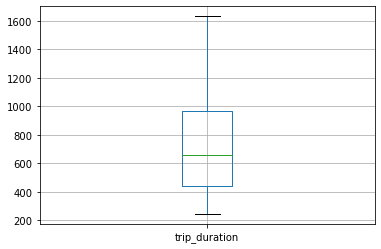

In [41]:
Q1 =  train_df['trip_duration'].quantile(0.1)
Q3 = train_df['trip_duration'].quantile(0.9)
train_df = train_df[(train_df['trip_duration'] > Q1) & (train_df['trip_duration'] < Q3)]
train_df.boxplot(column="trip_duration")

Так же есть поездки с 0 пассажирами, так же удалим так как их количество не значительное.

In [42]:
train_df.passenger_count.value_counts()
train_df=train_df[train_df.passenger_count!=0]
train_df.passenger_count.value_counts()

1    58047
2    11847
5     4570
3     3323
6     2686
4     1628
Name: passenger_count, dtype: int64

# 1.3 Дополнение набора данных

Загрузка данных о погоде, преобразование столбца с датой в формут datetime, для обединения с train_df.

In [43]:
weather_df = pd.read_csv('weather.csv')
weather_df['date'] = pd.to_datetime(weather_df['date'])
df = pd.merge(train_df, weather_df, on = 'date')

Далее мы можем удалить этот столбец с датой, так как у нас уже есть такой, только со времением.

In [45]:
df.drop('date', axis = 1, inplace = True)

Переведем значения градусов из фаренгейта в цельсии, для удобства.

In [46]:
df['maximum temperature C']=(5*(df['maximum temperature']-32)/9).round()
df['minimum temperature C']=(5*(df['minimum temperature']-32)/9).round()
df['average temperature C']=(5*(df['average temperature']-32)/9).round()

Проверяем температуру на выбросы.

<AxesSubplot:>

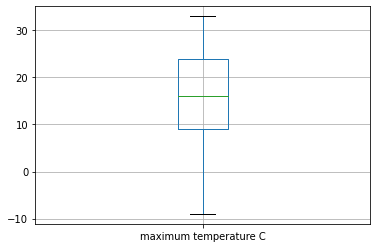

In [47]:
df.boxplot(column="maximum temperature C")

<AxesSubplot:>

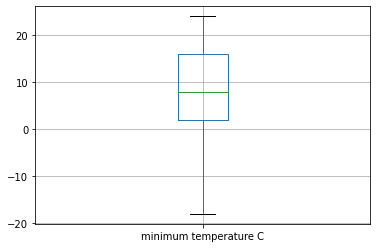

In [48]:
df.boxplot(column="minimum temperature C")

<AxesSubplot:>

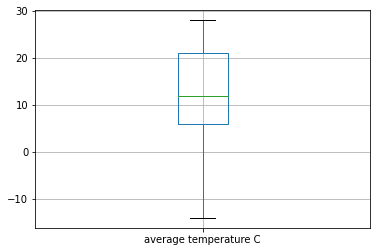

In [56]:
df.boxplot(column="average temperature C")

# 1.4 Подготовка отчета

In [59]:
df.to_csv('Report_C1.csv')